In [4]:
import matplotlib.pyplot as plt
import numpy as np

from structured_random_features.src.models.weights import V1_weights


# Package for importing image representation
from PIL import Image, ImageOps

# My code
from src.V1_reconst import generate_Y, reconstruct
from src.filter_reconst import filter_reconstruction

import seaborn as sns
import time
import os.path

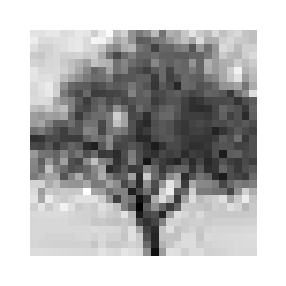

In [137]:
image_nm = 'tree_part1.jpg'
img_nm = image_nm.split('.')[0]
img = Image.open('image/' + image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.figure(dpi = 300, figsize=(1, 1))
plt.imshow(img, 'gray')
plt.axis('off')
dim = img_arr.shape

75.62225650316576
23.527968082843323
23.827895089094433
23.579845941651747


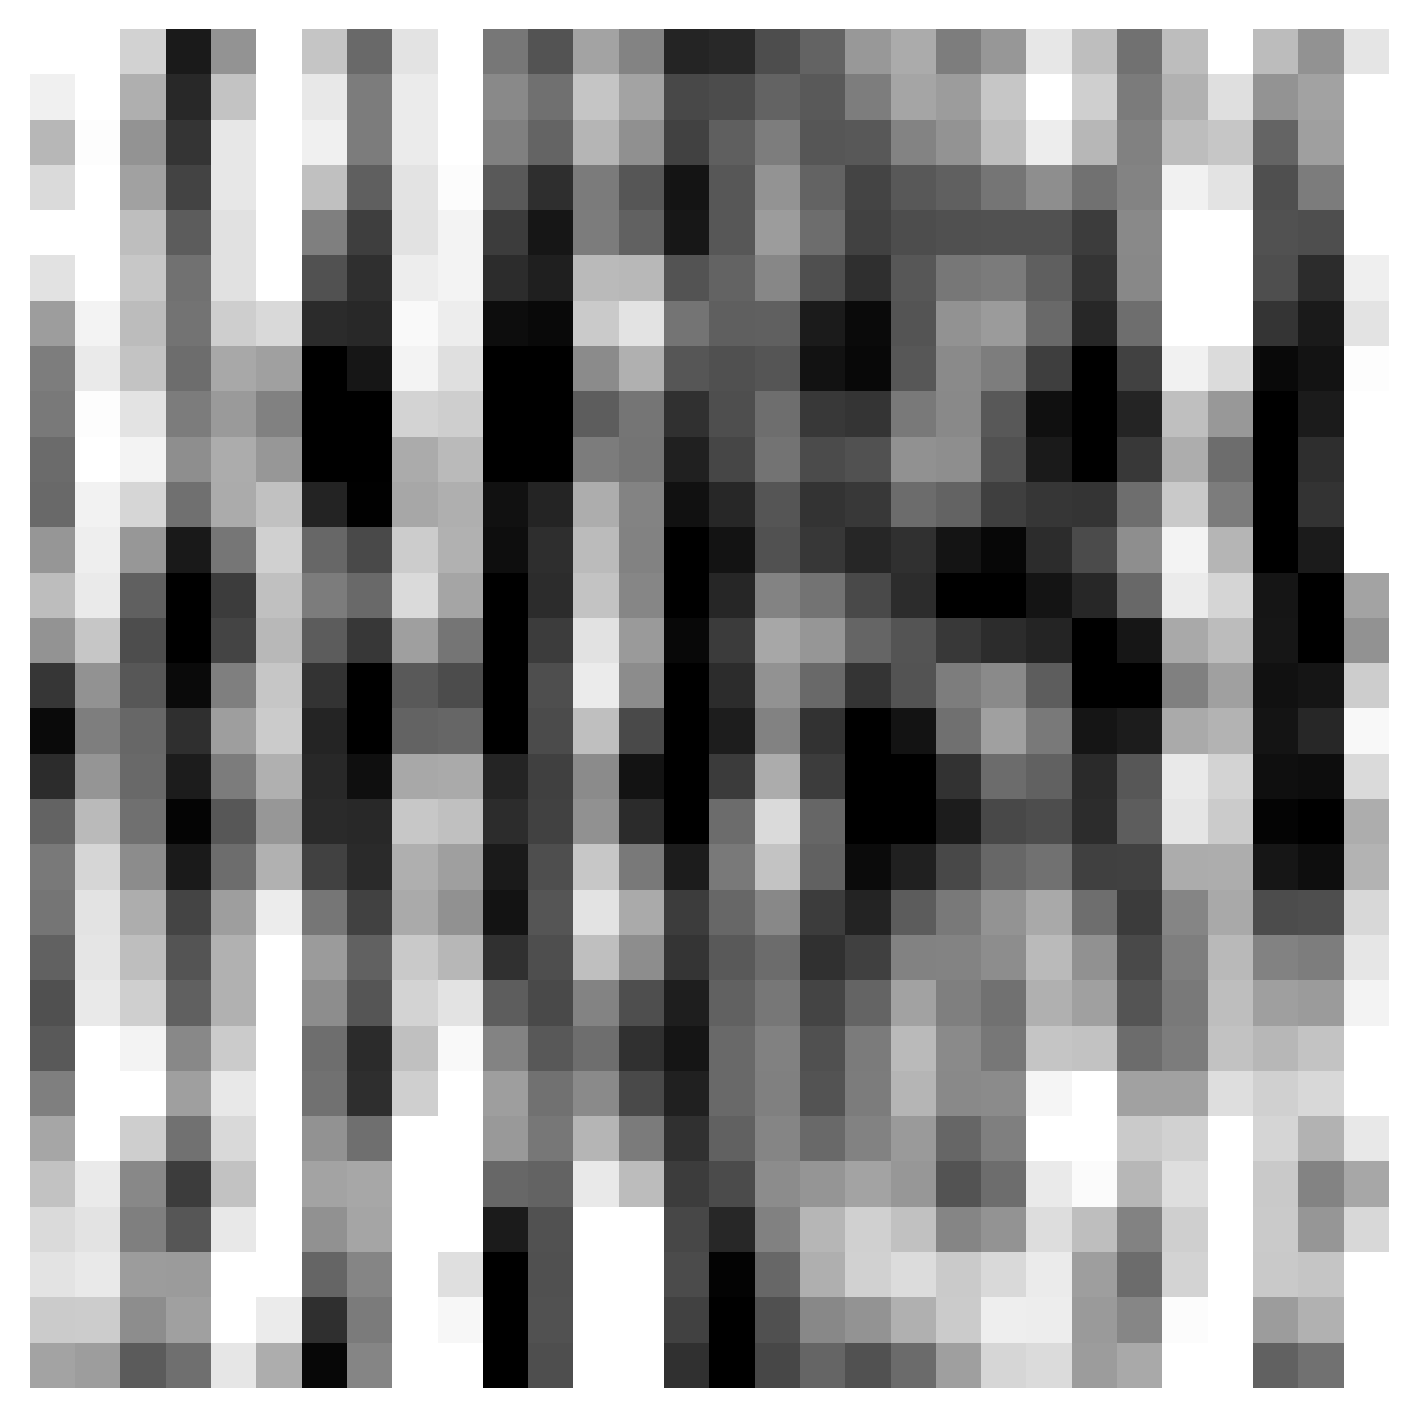

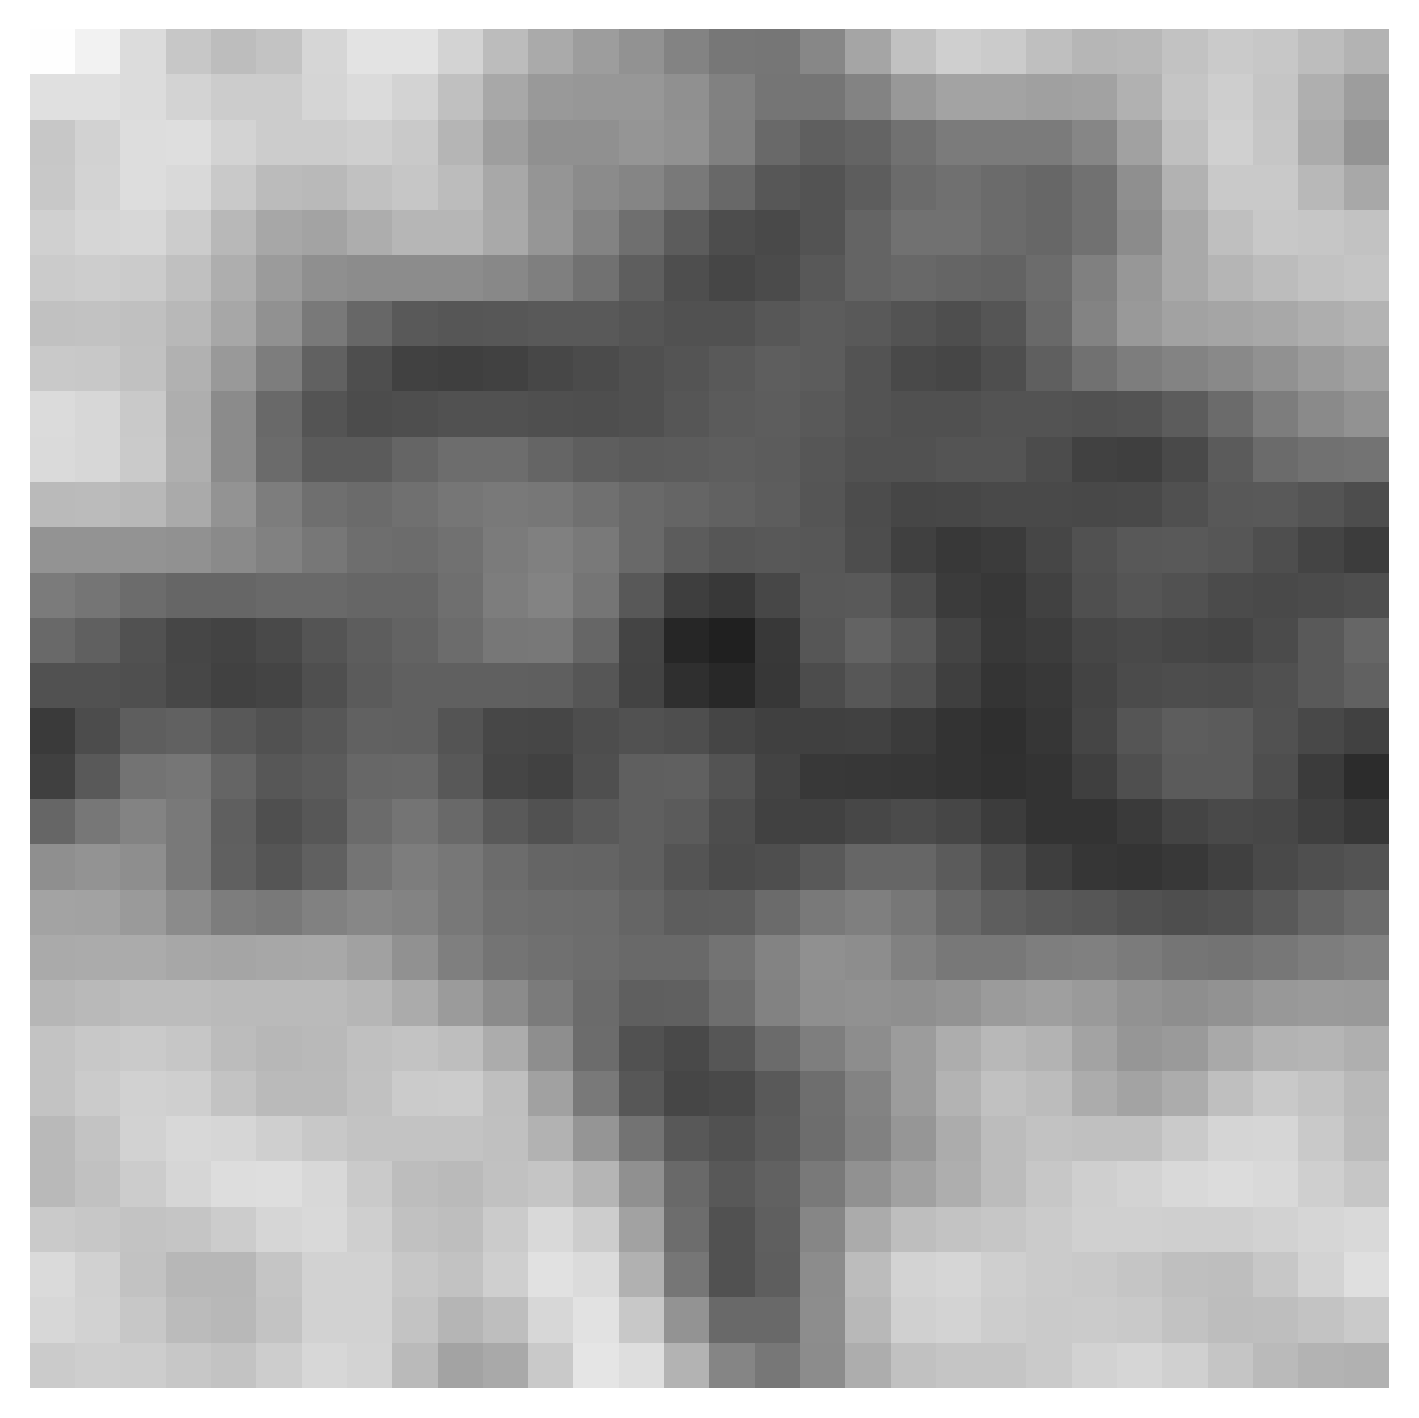

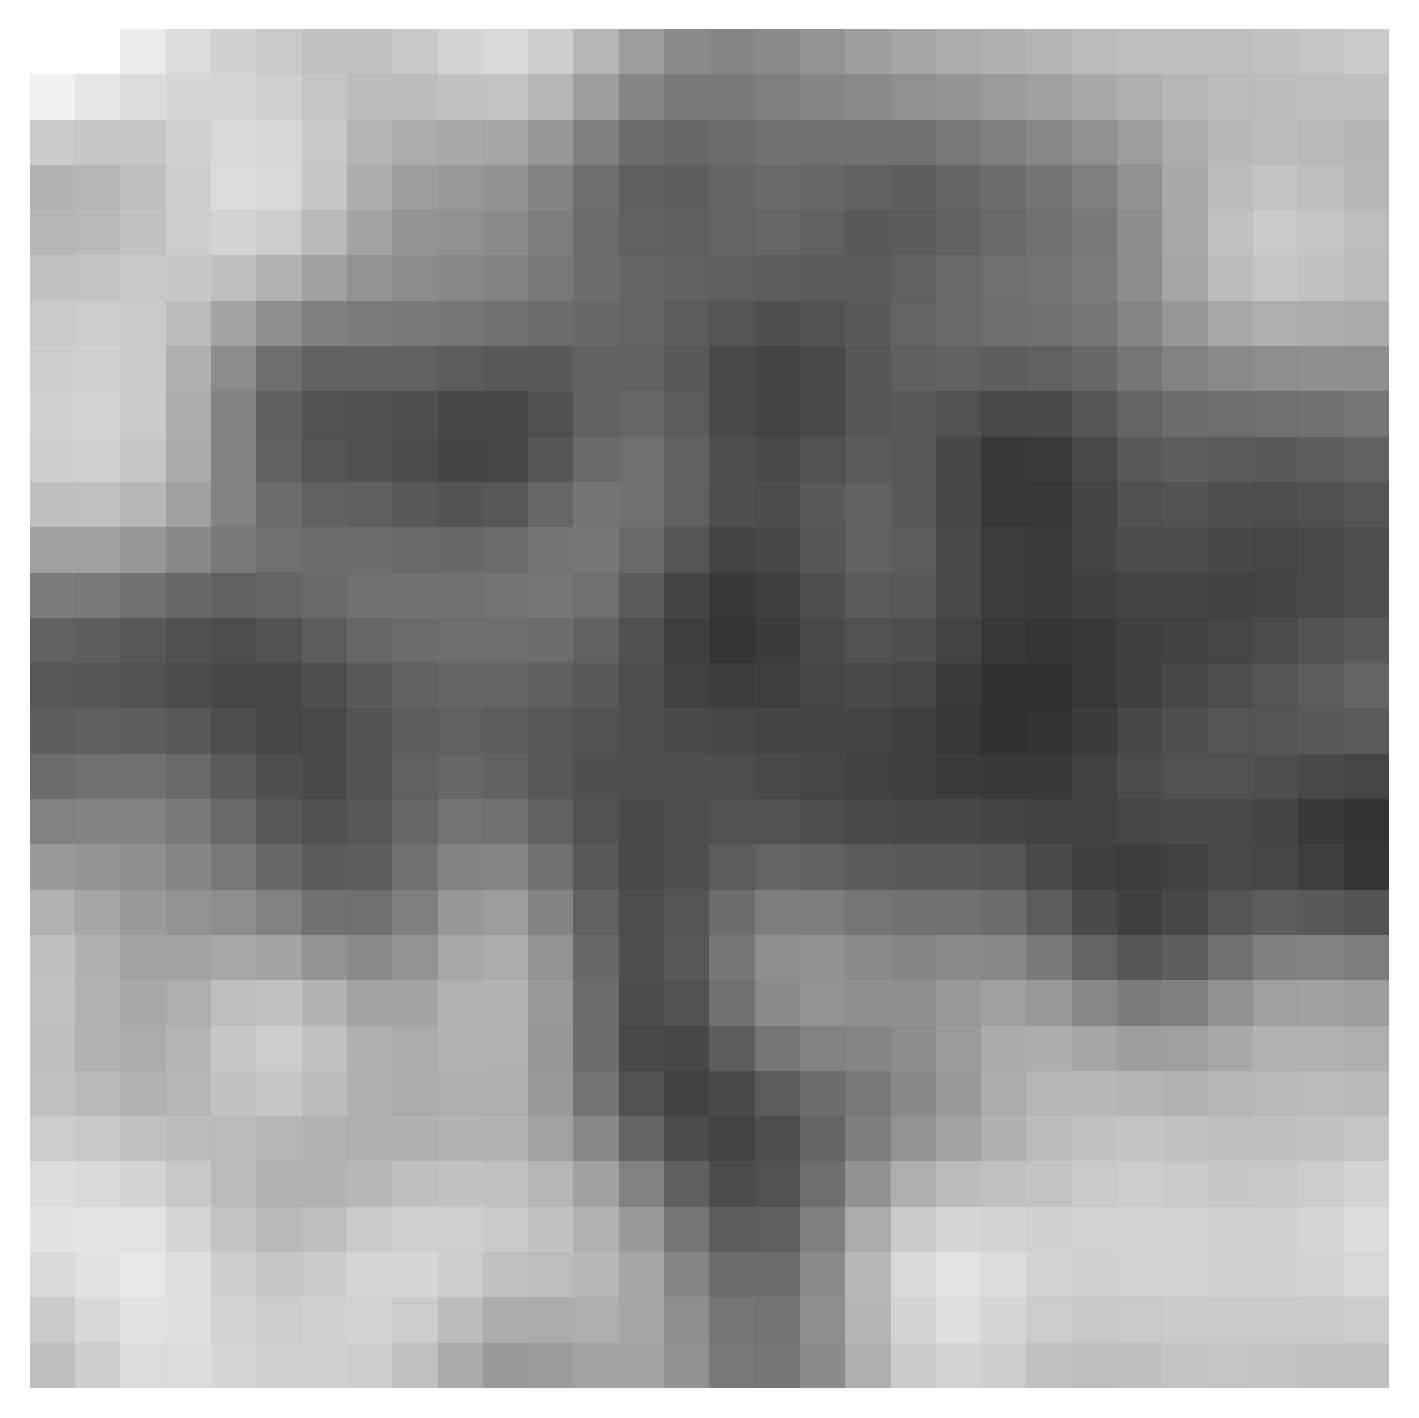

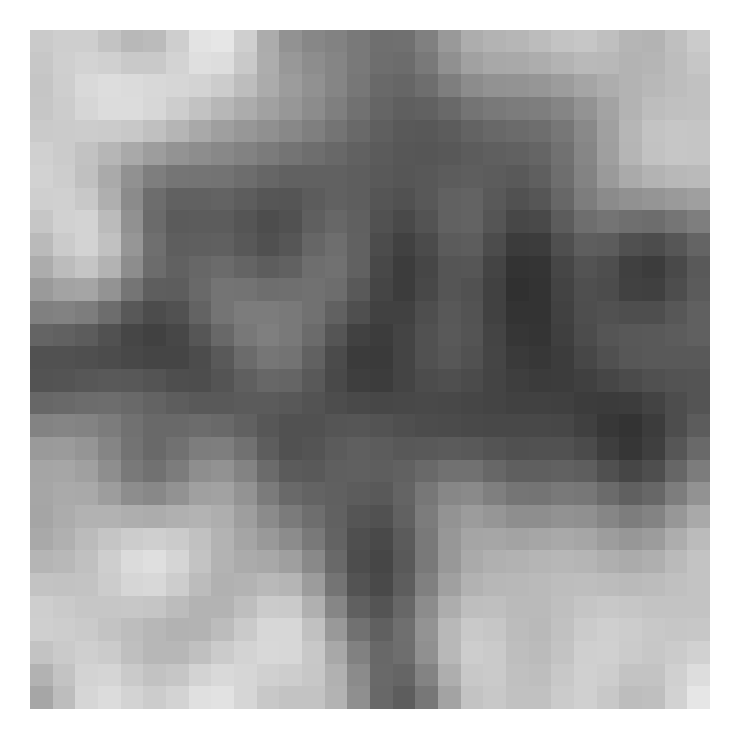

In [160]:
num_cell = 100
cell_size = 7
sparse_freq = 2
dim = img_arr.shape
n,m = dim
alpha = [0.1, 1, 10]

for alp in alpha:
    W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
    y = generate_Y(W, img_arr)
    W_rev = W.reshape(num_cell, n, m)
    theta, reconst, s = reconstruct(W_rev, y, alp)
    error = np.linalg.norm(img_arr - reconst, 'fro') / np.sqrt(n*m)
    print(error)
    plt.figure(figsize=(6, 6), dpi = 300)
    plt.imshow(reconst, 'gray')
    plt.axis('off')
    plt.clim(0, 255)

    
    
    
alpha = 10
W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
y = generate_Y(W, img_arr)
W_rev = W.reshape(num_cell, n, m)
theta, reconst, s = reconstruct(W_rev, y, alp)
error = np.linalg.norm(img_arr - reconst, 'fro') / np.sqrt(n*m)
print(error)
plt.figure(figsize=(3, 3), dpi = 300)
plt.imshow(reconst, 'gray')
plt.axis('off')
plt.clim(0, 255)
plt.savefig("result/{img_nm}/V1/alpha_reconst/alpha_{alp}_sample_{samp}.png".
                    format(img_nm = img_nm, alp = alpha, samp = num_cell), dpi = 300)

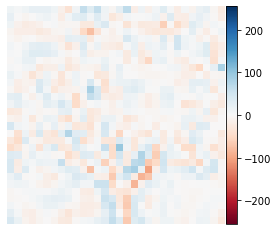

In [161]:
ax = plt.imshow(img_arr - reconst, cmap='RdBu')
plt.axis('off')
plt.colorbar(ax, pad = 0.005)
plt.clim((-255, 255))
plt.savefig("result/{img_nm}/V1/alpha_reconst/error_img_alpha_{alp}_sample_{samp}.png".
                    format(img_nm = img_nm, alp = 1, samp = num_cell, err = error), dpi = 300)